# Gérémy Michaud

<h1 style="text-align:center">Travail pratique numérique en thermodynamique statistique</h1>
<h2 style="text-align:center">PARTIE 1 : Cinétique des gaz parfaits</h2>

Veuillez indiquer le nom des membres de votre équipe dans la cellule suivante.

- Pierre-Olivier Desrosiers<br>
- Nicolas Dorval<br>
- Gérémy Michaud<br>
- Félix-Antoine Dupuis

# Atelier en classe : 31 janvier 2024 #
### Discussion interdisciplinaire de sujets en probablilité & statistiques ###

**Quelques fondements de mathématiques statistiques:** par exemple bien définir variables aléatoires, échantillon et population totale, estimateurs, fonction de distribution cumulative (répartition), densité de probabilité, moments, etc. - **Programme GPH**

**Les distributions statistiques de particules indiscernables:** en particulier celle de Fermi-Dirac avec les notions de potentiel chimique et d’occupation des états en fonction de la température, en analogie avec le remplissage selon le principe principe d’Aufbau introduit en classe pour les atomes à température nulle. - **Programme PHY**

**_Un point de bonus sera accordé à tous les étudiantes et étudiants qui participeront à l'atelier pour discuter des sujets ci-dessus et débuter le travail de la première partie ci-dessous._**

# Introduction #
Ce travail révise d'abord quelques bases générales de mécanique statistique classique avec le script `TDSrevision-2Dsimulation.py` qui simule la théorie cinétique des gaz parfaits en 2D. Cette simulation utilise le concept de sphères dures, mais ici pour le cas des particules d'un gaz afin d'introduire des collisions élastiques entre elles sur leurs trajectoires ballistiques. Notez qu'une sphère est colorée et grossie seulement pour l’effet visuel dans l'animation, la physique de l’algorithme codé considère bien des particules totalement identiques. Les questions sur cette simulation, à répondre directement dans les cellules du carnet _(Notebook)_ ici-même, explorent quelques paramètres de la thermodynamique statistique et introduisent de nouveaux termes utiles à l'étude de la dynamique des électrons dans la matière.

_N.B._ 
- _Pour montrer les animations à l'écran, le script `TDSrevision-2Dsimulation.py` importe la librairie `VPython` qu'il faut donc installer. Des liens vers sa documentation et de l'information complémentaire sont donnés dans la médiagraphie à la fin._
- _Le code dans ce script est abusivement commenté dans notre contexte pédagogique, mais il serait bien sûr préférable de s’en tenir aux recommandations du <a href="https://www.python.org/dev/peps/pep-0008"> PEP 8 — Style Guide for Python Code</a>._
- _Notez finalement que la boucle principale à la fin du script laisse l'utilisateur voir l'animation aussi longtemps que souhaité, assurez-vous donc de savoir comment l'interrompre correctement avant de lancer la simulation ou de la remplacer par une boucle `for`._

# Cinétique CLASSIQUE des gaz parfaits #

### Simulation 2D ###

In [61]:
from vpython import *
from IPython.display import display, Math
import numpy as np
import math
import matplotlib.pyplot as plt
import time
from scipy.stats import describe, norm
import seaborn as sns
palette = sns.color_palette("colorblind")

Pour visualiser la simulation et consulter le code complet correspondant, veuillez exécuter le fichier ```TDS-2Dsimulation_H24.py```.

In [62]:
start_time = time.time()
# Déclaration de variables influençant le temps d'exécution de la simulation
Natoms = 200  # change this to have more or fewer atoms
dt = 1E-5  # pas d'incrémentation temporel

# Déclaration de variables physiques "Typical values"
mass = 4E-3/6E23 # helium mass
Ratom = 0.01 # wildly exaggerated size of an atom
k = 1.4E-23 # Boltzmann constant
T = 300 # around room temperature

# CANEVAS DE FOND
L = 1 # container is a cube L on a side

# ARÊTES DE BOÎTE 2D
d = L/2+Ratom
r = 0.005

# POSITION ET QUANTITÉ DE MOUVEMENT INITIALE DES SPHÈRES
Atoms = [] # Objet qui contiendra les sphères pour l'animation
p = [] # quantité de mouvement des sphères
apos = [] # position des sphères
pavg = sqrt(2*mass*1.5*k*T) #Principe de l'équipartition de l'énergie en thermodynamique statistique classique

for i in range(Natoms):
    x = L*random()-L/2 # position aléatoire qui tient compte que l'origine est au centre de la boîte
    y = L*random()-L/2
    z = 0
    apos.append(vec(x,y,z)) # liste de la position initiale de toutes les sphères
    phi = 2*pi*random() # direction aléatoire pour la quantité de mouvement
    px = pavg*cos(phi)  # quantité de mvt initiale selon l'équipartition
    py = pavg*sin(phi)
    pz = 0
    p.append(vector(px,py,pz)) # liste de la quantité de mvt initiale de toutes les sphères

# FONCTION POUR IDENTIFIER LES COLLISIONS, I.E. LORSQUE LA DISTANCE ENTRE LES CENTRES DE 2 SPHÈRES EST À LA LIMITE DE S'INTERPÉNÉTRER
def checkCollisions():
    hitlist = []   # initialisation
    r2 = 2*Ratom   # distance critique où les 2 sphères entre en contact à la limite de leur rayon
    r2 *= r2   # produit scalaire pour éviter une comparaison vectorielle ci-dessous
    for i in range(Natoms):
        ai = apos[i]
        for j in range(i) :
            aj = apos[j]
            dr = ai - aj   # la boucle dans une boucle itère pour calculer cette distance vectorielle dr entre chaque paire de sphère
            if mag2(dr) < r2:   # test de collision où mag2(dr) qui retourne la norme élevée au carré de la distance intersphère dr
                hitlist.append([i,j]) # liste numérotant toutes les paires de sphères en collision
    return hitlist

iterations = 10000
for i in range(iterations):
    # DÉPLACE TOUTES LES SPHÈRES D'UN PAS SPATIAL deltax
    vitesse = []   # vitesse instantanée de chaque sphère
    deltax = []  # pas de position de chaque sphère correspondant à l'incrément de temps dt
    for i in range(Natoms):
        vitesse.append(p[i]/mass)   # par définition de la quantité de nouvement pour chaque sphère
        deltax.append(vitesse[i] * dt)   # différence avant pour calculer l'incrément de position
        apos[i] = apos[i] + deltax[i]  # nouvelle position de l'atome après l'incrément de temps dt

    # CONSERVE LA QUANTITÉ DE MOUVEMENT AUX COLLISIONS AVEC LES PAROIS DE LA BOÎTE
    for i in range(Natoms):
        loc = apos[i]
        if abs(loc.x) > L/2:
            if loc.x < 0: p[i].x =  abs(p[i].x)  # renverse composante x à la paroi de gauche
            else: p[i].x =  -abs(p[i].x)   # renverse composante x à la paroi de droite
        if abs(loc.y) > L/2:
            if loc.y < 0: p[i].y = abs(p[i].y)  # renverse composante y à la paroi du bas
            else: p[i].y =  -abs(p[i].y)  # renverse composante y à la paroi du haut

    # LET'S FIND THESE COLLISIONS!!!
    hitlist = checkCollisions()

    # CONSERVE LA QUANTITÉ DE MOUVEMENT AUX COLLISIONS ENTRE SPHÈRES
    for ij in hitlist:

        # définition de nouvelles variables pour chaque paire de sphères en collision
        i = ij[0]  # extraction du numéro des 2 sphères impliquées à cette itération
        j = ij[1]
        ptot = p[i]+p[j]   # quantité de mouvement totale des 2 sphères
        mtot = 2*mass    # masse totale des 2 sphères
        Vcom = ptot/mtot   # vitesse du référentiel barycentrique/center-of-momentum (com) frame
        posi = apos[i]   # position de chacune des 2 sphères
        posj = apos[j]
        vi = p[i]/mass   # vitesse de chacune des 2 sphères
        vj = p[j]/mass
        rrel = posi-posj  # vecteur pour la distance entre les centres des 2 sphères
        vrel = vj-vi   # vecteur pour la différence de vitesse entre les 2 sphères

        # exclusion de cas où il n'y a pas de changements à  faire
        if vrel.mag2 == 0: continue  # exactly same velocities si et seulement si le vecteur vrel devient nul, la trajectoire des 2 sphères continue alors côte à côte
        if rrel.mag > Ratom: continue  # one atom went all the way through another, la collision a été "manquée" à l'intérieur du pas deltax

        # calcule la distance et temps d'interpénétration des sphères dures qui ne doit pas se produire dans ce modèle
        dx = dot(rrel, vrel.hat)       # rrel.mag*cos(theta) où theta is the angle between vrel and rrel:
        dy = cross(rrel, vrel.hat).mag # rrel.mag*sin(theta)
        alpha = asin(dy/(2*Ratom))  # alpha is the angle of the triangle composed of rrel, path of atom j, and a line from the center of atom i to the center of atom j where atome j hits atom i
        d = (2*Ratom)*cos(alpha)-dx # distance traveled into the atom from first contact
        deltat = d/vrel.mag         # time spent moving from first contact to position inside atom

        # CHANGE L'INTERPÉNÉTRATION DES SPHÈRES PAR LA CINÉTIQUE DE COLLISION
        posi = posi-vi*deltat   # back up to contact configuration
        posj = posj-vj*deltat
        pcomi = p[i]-mass*Vcom  # transform momenta to center-of-momentum (com) frame
        pcomj = p[j]-mass*Vcom
        rrel = hat(rrel)    # vecteur unitaire aligné avec rrel
        pcomi = pcomi-2*dot(pcomi,rrel)*rrel # bounce in center-of-momentum (com) frame
        pcomj = pcomj-2*dot(pcomj,rrel)*rrel
        p[i] = pcomi+mass*Vcom # transform momenta back to lab frame
        p[j] = pcomj+mass*Vcom
        apos[i] = posi+(p[i]/mass)*deltat # move forward deltat in time, ramenant au même temps où sont rendues les autres sphères dans l'itération
        apos[j] = posj+(p[j]/mass)*deltat
        
print("--- %.3f seconds ---" % (time.time() - start_time))

--- 149.350 seconds ---


### Questions statistiques ###

**I.** _(3 points)_  &mdash; Utilisez la liste finale des vecteurs de quantité de mouvement $\vec{p}$ de toutes les sphères pour trouver la moyenne de son carré $\langle p^2\rangle=\langle\vec{p}\cdot\vec{p}\rangle$ et l'imprimer avec la fonction `print()` dans la cellule qui suit. 

In [63]:
p_squared_avg = sum([mag2(pi) for pi in p]) / Natoms
display(Math(f'\\langle p^2 \\rangle \\approx {p_squared_avg:.3e}\; [kg \cdot m/s]^2'))

<IPython.core.display.Math object>

**II.** _(2 points)_  &mdash; La température $T$ (macroscopique) est proportionnelle à l'énergie cinétique moyenne $E_{cin}$ de l'ensemble des particules lorsque ce système est rendu à l'équilibre. Celle-ci peut se calculer classiquement selon son <a href="https://fr.wikipedia.org/wiki/%C3%89quipartition_de_l%27%C3%A9nergie">principe d'équipartition</a>, _i.e._ répartissant l'énergie également sur chaque degré de liberté ici en translation seulement, d'où au total pour $i=1,2\text{ ou } 3$ dimensions d'espace réel
\begin{equation}
E_{cin}=\frac{\langle p^2 \rangle}{2m}=i\times\frac{1}{2}k_BT
\end{equation}
avec $k_B$, la constante de Boltzmann et $m$, la masse de chaque particule. Quelle est la température du gaz de sphères dures à la fin de la simulation? Est-ce qu'elle a changé significativement par rapport à sa valeur initiale?

En tenant compte des 3 degrés de liberté ($i = 3$) en translation de chaque particule de masse constante $m$ dans le cube, nous réarrangeons l'équation pour résoudre pour la température $T_{final}$ et nous obtenons :
\begin{equation*}
T_{final} = \frac{\langle p^2 \rangle}{3mk_B}
\end{equation*}

In [64]:
deg_liberte = 3
T_final = p_squared_avg / (deg_liberte*mass*k)
print(f"Température initiale: {T:.3f} K")
print(f"Température initiale: {T_final:.3f} K")
if round(T_final, 3) > T:
    print(f"La température finale est donc {T_final/T:.2f} fois plus élevée que la température initiale.")
elif round(T_final, 3) < T:
    print(f"La température finale est donc {T/T_final:.2f} fois plus faible que la température initiale.")
else:
    print(f"La température finale est donc la même que la température initiale.")


Température initiale: 300.000 K
Température initiale: 300.000 K
La température finale est donc la même que la température initiale.


Ainsi, la température finale ne diffère pas significativement de la température initiale à quelques arrondissements numériques près. <br>
L'ajout ou le retrait d'un degré de liberté affecte la température, car l’énergie est répartie également entre tous les degrés de liberté, d’où le nom du principe « d'équipartition ».

**III.** _(10 points)_ &mdash; Modifiez le code de la simulation pour ajouter une fonction qui suit la trajectoire d'UNE SEULE particule, c'est-à-dire qu'elle doit enregistrer, dans une liste, des valeurs de variables pour cette particule et ce, à chacune de ses collisions avec une autre particule (_i.e._ excluez les collisions avec les parois de la boîte). Les deux variables scalaires à lister sont:
- la distance que la particule a parcouru entre chaque collision,
- le temps écoulé entre ces collisions.

Copiez le code de votre fonction dans la cellule qui suit en y commentant clairement les variables pour ces listes qui devront persister après avoir interrompu l'exécution de la simulation. N'oubliez pas d'inclure votre fichier Python (`.py`) modifié avec la simulation complète lors de la remise.

In [65]:
# Les fonctions ci-dessous ont été ajoutées uniquement pour faciliter la compréhension de la simulation 
# et pour éviter les erreurs dues à une mauvaise compilation (compilation abusive du même bloc de code sans compiler la simulation).
def update_positions():
    """
    Met à jour les positions des sphères en fonction de leur vitesse actuelle et du pas de temps.

    Args:
        global apos: Liste des positions des sphères
    """
    global apos
    vitesse = [p[i] / mass for i in range(Natoms)]  # Calcul de la vitesse pour chaque sphère
    deltax = [vitesse[i] * dt for i in range(Natoms)]   # Calcul du déplacement pour chaque sphère
    apos = [apos[i] + deltax[i] for i in range(Natoms)]  # Mise à jour des positions des sphères

def handle_wall_collisions():
    """
    Gère les collisions avec les parois de la boîte en inversant la composante de la vitesse
    lorsque la sphère atteint une paroi.

    Args:
        global apos: Liste des positions des sphères
        global p: Liste des quantités de mouvement des sphères
    """
    for i in range(Natoms):
        loc = apos[i]
        if abs(loc.x) > L / 2:
            p[i].x = abs(p[i].x) if loc.x < 0 else -abs(p[i].x)
        if abs(loc.y) > L / 2:
            p[i].y = abs(p[i].y) if loc.y < 0 else -abs(p[i].y)

def handle_particle_collision(particle_index, j):
    """
    Gère les collisions entre deux sphères en ajustant les positions après la collision.

    Args:
        particle_index (int): Indice de la sphère d'intérêt
        j (int): Indice de la deuxième sphère impliquée dans la collision
        global apos: Liste des positions des sphères
        global p: Liste des quantités de mouvement des sphères
    """
    vi = p[particle_index] / mass
    vj = p[j] / mass
    rrel = apos[particle_index] - apos[j]
    vrel = vj - vi

    if vrel.mag2 == 0 or rrel.mag > Ratom:
        return

    dx = dot(rrel, vrel.hat)
    dy = cross(rrel, vrel.hat).mag
    alpha = asin(dy / (2 * Ratom))
    d = (2 * Ratom) * cos(alpha) - dx
    deltat = d / vrel.mag


# Cette fonction est la seule ayant été réellement ajoutée
def follow_particle_trajectory(particle_index):
    """
    Suit la trajectoire d'une particule spécifiée en enregistrant les positions et distances de collision.

    Args:
        particle_index (int): Index de la particule à suivre.

    Returns:
        Tuple: Tuple contenant les distances de collision, les temps écoulés entre les collisions
            et les positions de la particule entre chaque particule.
    """
    position_init = apos[particle_index]
    collision_positions = []
    collison_distances = []
    time_to_collision = []

    iterations = 10000
    for _ in range(iterations):
        update_positions()

        handle_wall_collisions()

        hitlist = checkCollisions()

        # Exclure les collisions avec les parois de la boîte et ne garder que celles impliquant la particule spécifiée
        hitlist = [(i, j) for (i, j) in hitlist if i == particle_index or j == particle_index]

        if not hitlist:
            continue  # Si aucune collision avec la particule spécifiée, continuez la simulation

        for ij in hitlist:
            j = ij[0] if ij[1] == particle_index else ij[1]
            handle_particle_collision(particle_index, j)

            if len(collision_positions) == 0:
                previous_position = position_init
                collision_positions.append(position_init)
            else:
                previous_position = collision_positions[-1]

            distance = mag(apos[particle_index] - previous_position)
            time_elapsed = distance / mag(p[j] / mass)  # Utilisation de la vitesse de la particule j après la collision

            collision_positions.append(apos[particle_index])
            collison_distances.append(distance)
            time_to_collision.append(time_elapsed)

            apos[particle_index] = apos[particle_index] + vi * deltat

    return collison_distances, time_to_collision, collision_positions

# Utilisation de la fonction pour suivre la trajectoire de la particule
particle_index_to_follow = 20
trajectory_result = follow_particle_trajectory(particle_index_to_follow)

**IV.** _(2 points)_ &mdash; Calculez le **libre parcours moyen** $l_{moy}$ et le **temps de collision** $\tau$ qui sont les valeurs moyennes des deux listes compilées au numéro précédent.

_(Pour votre information, le libre parcours moyen est de l’ordre de 100 nm dans l'air à température et pression ambiantes, mais_ $l_{moy}$ _peut dépasser 100 000 km dans une enceinte sous vide avec les technologies de pompes modernes!)_

In [66]:
lpm = np.mean(trajectory_result[0])
tdc = np.mean(trajectory_result[1])

display(Math(f"l_{{moy}} \\approx {lpm:.5f}\; [m]"))
display(Math(f"\\tau \\approx {tdc:.5e}\; [s]"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**V.** _(2 points)_ Calculez la vitesse $\vec{v}$ de la particule entre chaque paire de collisions. Quelle est la vitesse moyenne $\langle\vec{v}\rangle$ de la particule?

La vitesse $\vec{v}$ de la particule étudiée entre chaque paire de collisions est déterminée en utilisant la position de la particule à chaque collision ainsi que le temps écoulé entre ces collisions.

In [67]:
def calculate_velocities(positions, time_intervals):
    """
    Calcule les vitesses entre chaque paire de collisions.

    Args:
        positions (list): Liste des positions de la particule.
        time_intervals (list): Liste des intervalles de temps entre chaque paire de collisions.

    Returns:
        list: Liste des vecteur de vitesse de la particule entre chaque paire de collisions.
    """
    velocities = []

    for i in range(1, len(positions)):
        delta_position = positions[i] - positions[i - 1]
        time_interval = time_intervals[i - 1]
        velocity = delta_position / time_interval
        velocities.append(velocity)

    return velocities

positions = trajectory_result[2]
time_intervals = trajectory_result[1]

velocities = calculate_velocities(positions, time_intervals)
mean_velocity = np.mean(velocities)

formatted_mean_velocity = f"<{mean_velocity.x:.3f},\; {mean_velocity.y:.3f},\; {mean_velocity.z:.0f}>"
display(Math(f"\\langle \\vec{{v}} \\rangle \\approx\; {formatted_mean_velocity}\; [m/s]"))

<IPython.core.display.Math object>

Nous remarquons que la vitesse moyenne tend à se rapprocher de zéro à mesure que l'on augmente le nombre d'itérations de la simulation, reflétant ainsi l'équilibre des mouvements dans différentes directions au fil du temps dans une enceinte fermée.

**VI.** _(5 points)_ &mdash; Pour cette même liste de vitesses, comparez les distributions de la norme $||\vec{v}||$, du carré $v^2$ et d’une de ses composantes $v_x^2$ en étalonnant l’abscisse pour contraster les histogrammes avec une échelle appropriée. Indiquez sur ce graphique la moyenne, le mode, la médiane et la moyenne quadratique des distributions.

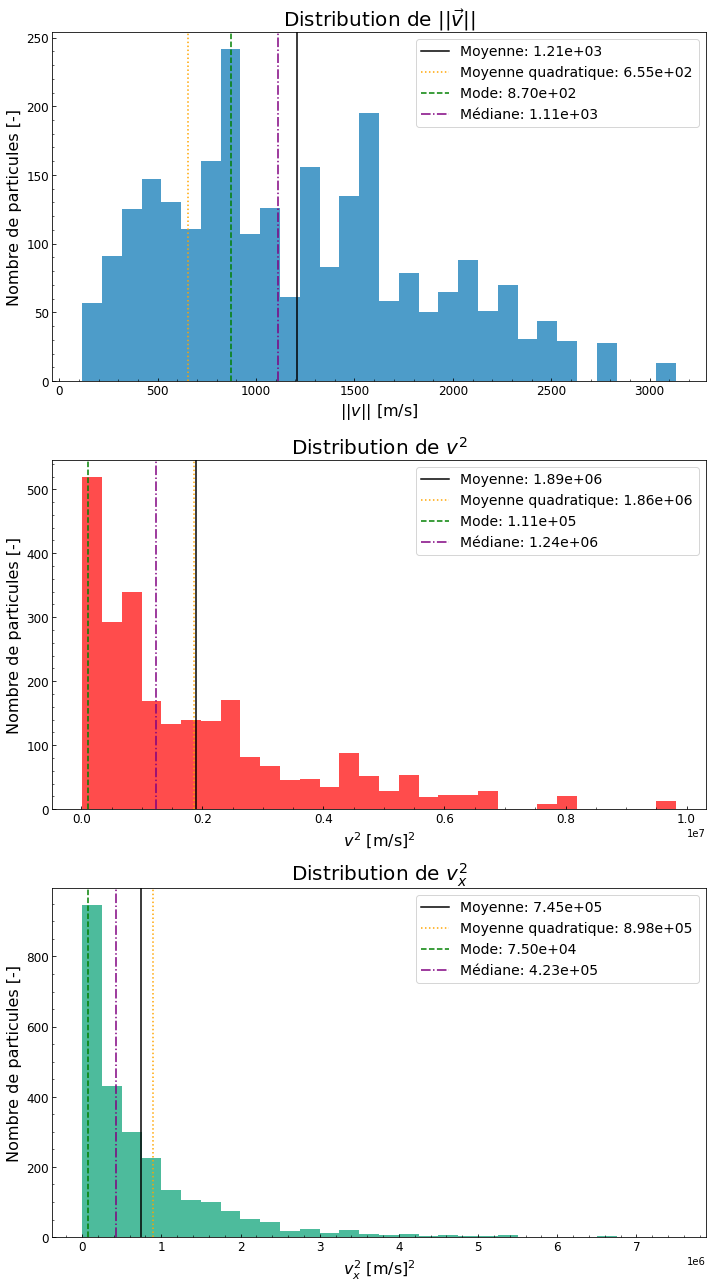

In [81]:
def calculate_statistics(data):
    """
    Calcule les statistiques des données, y compris la description, le mode et la médiane.

    Args:
        data (numpy.ndarray): Les données pour lesquelles les statistiques doivent être calculées.

    Returns:
        tuple: Un tuple contenant la description des données, le mode et la médiane.
    """
    stats_data = describe(data)
    
    hist_data, bin_edges_data = np.histogram(data, bins=50)
    mode_index_data = np.argmax(hist_data)
    mode_data = (bin_edges_data[mode_index_data] + bin_edges_data[mode_index_data + 1]) / 2
    
    median_data = np.median(data)
    
    return stats_data, mode_data, median_data

def plot_histogram(ax, data, color, title, axe_title, stats, mode, median):
    """
    Crée un histogramme et le plot sur l'axe spécifié.

    Args:
        ax (matplotlib.axes.Axes): L'axe sur lequel le graphique doit être tracé.
        data (numpy.ndarray): Les données à représenter.
        color (str): La couleur du graphique.
        title (str): Le titre du graphique.
        axe_title (str): Le titre de l'axe X.
        stats (scipy.stats._stats.DescribeResult): La description statistique des données.
        mode (float): La valeur du mode.
        median (float): La valeur de la médiane.
    """
    ax.hist(data, bins=30, color=color, alpha=0.7)
    ax.set_title(title, fontsize=20)
    ax.axvline(x=stats.mean, color='black', linestyle='solid', label=f'Moyenne: {stats.mean:.2e}')
    ax.axvline(x=np.sqrt(stats.variance), color='orange', linestyle='dotted', label=f'Moyenne quadratique: {np.sqrt(stats.variance):.2e}')
    ax.axvline(x=mode, color='green', linestyle='dashed', label=f'Mode: {mode:.2e}')
    ax.axvline(x=median, color='purple', linestyle='dashdot', label=f'Médiane: {median:.2e}')
    ax.legend(fontsize=14)
    ax.tick_params(which="both", axis="both", direction="in", labelsize=12)
    ax.minorticks_on()
    ax.set_ylabel("Nombre de particules [-]", fontsize=16)
    ax.set_xlabel(axe_title, fontsize=16)

# Données de vélocité
norms = np.array([np.sqrt(v.x**2 + v.y**2 + v.z**2) for v in velocities])
squared_velocities = np.array([v.x**2 + v.y**2 + v.z**2 for v in velocities])
squared_vx = np.array([v.x**2 for v in velocities])

# Calcul des données et des statistiques
data_list = [norms, squared_velocities, squared_vx]
colors = [palette[0], "red", palette[2]]
titles = [f"Distribution de $||\\vec{{v}}||$", f"Distribution de $v^2$", f"Distribution de $v_x^2$"]
axes_titles = [f"$||v||$ [m/s]", f"$v^2$ [m/s]$^2$", f"$v_x^2$ [m/s]$^2$"]

fig, axes = plt.subplots(3, 1, figsize=(10, 18))

for i, data in enumerate(data_list):
    stats, mode, median = calculate_statistics(data)
    plot_histogram(axes[i], data, colors[i], titles[i], axes_titles[i], stats, mode, median)

plt.tight_layout()
plt.show()

Les graphiques ci-dessus présentent distinctement la norme des vitesses selon la distribution de Maxwell-Boltzmann ($||v||$), ainsi que deux demi-gaussiennes ($v^2$ et $v_x^2$) accompagnées des données statistiques correspondantes.

À présent, rassemblons les trois courbes normalisées sur un même graphique afin de les comparer.

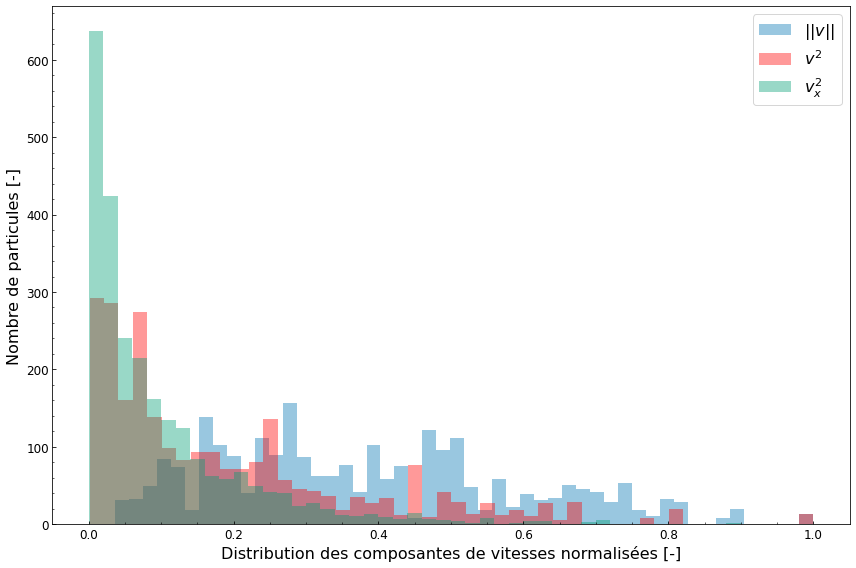

In [91]:
norms_normalized = norms / max(norms)
squared_velocities_normalized = squared_velocities / max(squared_velocities)
squared_vx_normalized = squared_vx / max(squared_vx)

plt.figure(figsize=(12, 8))

plt.hist(norms_normalized, bins=50, alpha=0.4, color=palette[0], label=f"$||v||$")
plt.hist(squared_velocities_normalized, bins=50, alpha=0.4, color="red", label=f"$v^2$")
plt.hist(squared_vx_normalized, bins=50, alpha=0.4, color=palette[2], label=f"$v_x^2$")
plt.legend(fontsize=16)
plt.minorticks_on()
plt.ylabel("Nombre de particules [-]", fontsize=16)
plt.xlabel("Distribution des composantes de vitesses normalisées [-]", fontsize=16)
plt.tight_layout()
plt.show()

**Bonus.** _(4 points)_ &mdash; Montrez que 
- (a) le théorème central limite est satisfait par une des distributions de vitesse du numéro précédent,
- (b) le système simulé est ergodique.

### (a) Théorème Central Limite:
Pour démontrer la satisfaction du théorème central limite, nous pouvons analyser la distribution des compostantes $x$ des vitesses ($v_x$) entre chaque paire de collisions. Selon le théorème central limite, la distribution échantillonnée d'un grand nombre de variables aléatoires indépendantes et identiquement distribuées sera normalement distribuée, pourvu que la taille de l'échantillon soit suffisamment grande. Cela est valable même si les variables d'origine ne suivent pas nécessairement une distribution normale, quelle que soit la forme de la population initiale.

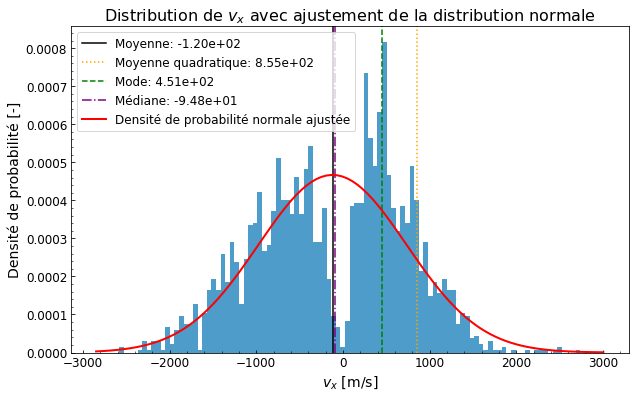

In [76]:
# Calcul des statistiques de la norme des vitesses
vx = np.array([v.x for v in velocities])
stats_vx, mode_vx, median_vx = calculate_statistics(vx)

# Plot de l'histogramme de la norme des vitesses
plt.figure(figsize=(10, 6))
plt.hist(vx, bins=100, density=True, color=palette[0], alpha=0.7)

# Ajout des lignes verticales pour les statistiques
plt.axvline(x=stats_vx.mean, color='black', linestyle='solid', label=f'Moyenne: {stats_vx.mean:.2e}')
plt.axvline(x=np.sqrt(stats_vx.variance), color='orange', linestyle='dotted', label=f'Moyenne quadratique: {np.sqrt(stats_vx.variance):.2e}')
plt.axvline(x=mode_vx, color='green', linestyle='dashed', label=f'Mode: {mode_vx:.2e}')
plt.axvline(x=median_vx, color='purple', linestyle='dashdot', label=f'Médiane: {median_vx:.2e}')

# Personnalisation des axes et ajout d'étiquettes
plt.tick_params(which="both", axis="both", direction="in", labelsize=12)
plt.minorticks_on()
plt.xlabel("$v_x$ [m/s]", fontsize=14)
plt.ylabel("Densité de probabilité [-]", fontsize=14)
plt.title("Distribution de $v_x$ avec ajustement de la distribution normale", fontsize=16)

# Ajustement de la distribution normale
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = norm.pdf(x, stats_vx.mean, np.sqrt(stats_vx.variance))
plt.plot(x, pdf, 'r', linewidth=2, label="Densité de probabilité normale ajustée")
plt.legend(fontsize=12)

# Affichage du graphique
plt.show()

En analysant l'histogramme présenté ci-dessus, nous remarquons la forme de cloche caractéristique, indicative d'une distribution normale. Cette tendance vers une distribution normale s'intensifie à mesure que le nombre d'itérations augmente et que les données statistiques convergent. En d'autres termes, l'approximation de la distribution de la norme de la vitesse par une distribution normale devient de plus en plus précise à mesure que le système évolue au fil du temps, confirmant ainsi la validité du théorème central limite.

Par ailleurs, il est notable que la densité de probabilité atteint zéro pour une vitesse $v_x$ nulle. Cette occurrence découle du calcul de cette dernière à partir de la distance et du temps entre chaque collision, avec la particularité que la structure du code ne permet pas deux collisions successives à la même position. Malgré cela, le profil global de la distribution normale de part et autre de $v_x=0$ demeure perceptible à un grand nombre d'itérations.

### (b) Ergodicité:

Un système ergodique se caractérise par le fait que les propriétés statistiques déduites à partir d'une seule trajectoire temporelle convergent vers les propriétés moyennes du système calculées sur un ensemble significativement vaste de trajectoires indépendantes. En d'autres termes, en observant le comportement d'une seule trajectoire, nous pouvons obtenir des informations représentatives de l'ensemble du système sur une multitude de trajectoires distinctes.

Pour vérifier cette caractéristique, nous pouvons analyser l'évolution de la moyenne des vitesses de la particule au fil du temps. Si, à mesure que le nombre d'itérations augmente, la moyenne des vitesses converge vers une valeur constante, cela indique que le système est ergodique.

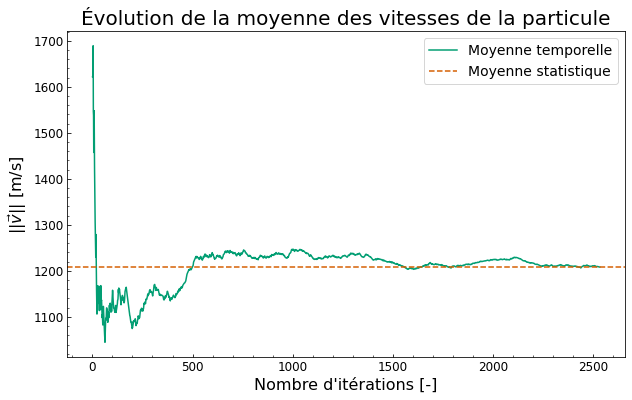

In [71]:
# Calcul des moyennes temporelles
time_average_norms = np.cumsum(norms) / np.arange(1, len(norms) + 1)

# Affichage de la convergence des moyennes temporelles et statistiques
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(1, len(norms) + 1), time_average_norms, color=palette[2], label="Moyenne temporelle")
ax.axhline(y=stats_norms.mean, linestyle='dashed', color=palette[3], label="Moyenne statistique")
ax.set_xlabel("Nombre d'itérations [-]", fontsize=16)
ax.set_ylabel("$||\\vec{v}||$ [m/s]", fontsize=16)
ax.set_title("Évolution de la moyenne des vitesses de la particule", fontsize=20)
ax.tick_params(which="both", axis="both", direction="in", labelsize=12)
ax.minorticks_on()
ax.legend(fontsize=14)
plt.show()

En observant la convergence des moyennes temporelles et statistiques de $||\vec{v}||$, nous pouvons conclure que le système est ergodique.

# Médiagraphie #
 - La simulation utilise la librairie <a href="https://vpython.org">VPython</a> conçue pour faciliter la visualisation de physique en 3D, avec les instructions d’installation <a href="https://vpython.org/presentation2018/install.html">ici</a> et la documentation <a href="https://www.glowscript.org/docs/VPythonDocs/index.html">ici</a>. Le code adapte en 2D et commente en détail l’exemple <a href="https://www.glowscript.org/#/user/GlowScriptDemos/folder/Examples/program/HardSphereGas-VPython">HardSphereGas-VPython</a> du site interactif <a href="https://www.glowscript.org">GlowScript</a> pour programmer des animations avec VPython directement en ligne.